# Imports

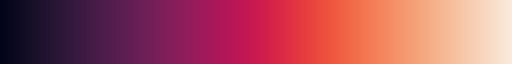

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from scipy.stats import f_oneway
from scipy.stats import ttest_rel
import seaborn as sns
from collections import Counter
import ast
from scipy.stats import norm
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from matplotlib.lines import Line2D
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")
plt.style.use('seaborn-v0_8')
sns.color_palette("rocket", as_cmap=True)

# Data Import & Set-Up

In [80]:
dir_path = "files/W_Paper_Files"

# RIO Test Results
cacheprof_RIO = pd.read_csv(f"{dir_path}/cacheprof-PHASEORDER-Iterative-PO-PAPER-RIO-RESULTS-0.csv", index_col=[0])
sorting_RIO = pd.read_csv(f"{dir_path}/sorting-PHASEORDER-Iterative-PO-PAPER-RIO-RESULTS-0.csv", index_col=[0])
maillist_RIO = pd.read_csv(f"{dir_path}/maillist-PHASEORDER-Iterative-PO-PAPER-RIO-RESULTS-0.csv", index_col=[0])
hidden_RIO = pd.read_csv(f"{dir_path}/hidden-PHASEORDER-Iterative-PO-PAPER-RIO-RESULTS-0.csv", index_col=[0])

# BOCA Test Results
cacheprof_BOCA = pd.read_csv(f"{dir_path}/cacheprof-PHASEORDER-BOCA-PO-PAPER-RESULTS-0.csv", index_col=[0])
sorting_BOCA = pd.read_csv(f"{dir_path}/sorting-PHASEORDER-BOCA-PO-PAPER-RESULTS-0.csv", index_col=[0])
maillist_BOCA = pd.read_csv(f"{dir_path}/maillist-PHASEORDER-BOCA-PO-PAPER-RESULTS-0.csv", index_col=[0])
hidden_BOCA = pd.read_csv(f"{dir_path}/hidden-PHASEORDER-BOCA-PO-PAPER-RESULTS-0.csv", index_col=[0])

# Control Group (O2 In Default Order)
cacheprof_default = pd.read_csv(f"{dir_path}/cacheprof-PHASEORDER-Iterative-BIGRIO-0.csv", index_col=[0])
hidden_default = pd.read_csv(f"{dir_path}/hidden-PHASEORDER-Iterative-PHASEORDERRIO-0.csv", index_col=[0])
maillist_default =  pd.read_csv(f"{dir_path}/maillist-PHASEORDER-Iterative-PHASEORDERRIO-0.csv", index_col=[0])
sorting_default = pd.read_csv(f"{dir_path}/sorting-PHASEORDER-Iterative-PHASEORDERRIO-0.csv", index_col=[0])

# Add additional RIO Results
for i in range(1,4):
    cacheprof_RIO = pd.concat([cacheprof_RIO, pd.read_csv(f"{dir_path}/cacheprof-PHASEORDER-Iterative-PO-PAPER-RIO-RESULTS-{i}.csv", index_col=[0])])
    sorting_RIO= pd.concat([sorting_RIO, pd.read_csv(f"{dir_path}/sorting-PHASEORDER-Iterative-PO-PAPER-RIO-RESULTS-{i}.csv", index_col=[0])])
    maillist_RIO = pd.concat([maillist_RIO, pd.read_csv(f"{dir_path}/maillist-PHASEORDER-Iterative-PO-PAPER-RIO-RESULTS-{i}.csv", index_col=[0])])
    hidden_RIO = pd.concat([hidden_RIO, pd.read_csv(f"{dir_path}/hidden-PHASEORDER-Iterative-PO-PAPER-RIO-RESULTS-{i}.csv", index_col=[0])])


# New Slow + Fast Rule:
cacheprof_special = pd.read_csv(f"{dir_path}/cacheprof-PHASEORDER-BOCA-PO-PAPER-RESULTS-SPECIAL-RULE-10P-0.csv", index_col=[0])
hidden_special = pd.read_csv(f"{dir_path}/hidden-PHASEORDER-BOCA-PO-PAPER-RESULTS-SPECIAL-RULE-10P-0.csv", index_col=[0])
maillist_special = pd.read_csv(f"{dir_path}/maillist-PHASEORDER-BOCA-PO-PAPER-RESULTS-SPECIAL-RULE-10P-0.csv", index_col=[0])
sorting_special = pd.read_csv(f"{dir_path}/sorting-PHASEORDER-BOCA-PO-PAPER-RESULTS-SPECIAL-RULE-10P-0.csv", index_col=[0])

cacheprof_special_5p = pd.read_csv(f"{dir_path}/cacheprof-PHASEORDER-BOCA-PO-PAPER-SPECIAL-RULE-5P-0.csv", index_col=[0])
hidden_special_5p = pd.read_csv(f"{dir_path}/hidden-PHASEORDER-BOCA-PO-PAPER-SPECIAL-RULE-5P-0.csv", index_col=[0])
maillist_special_5p = pd.read_csv(f"{dir_path}/maillist-PHASEORDER-BOCA-PO-PAPER-SPECIAL-RULE-5P-0.csv", index_col=[0])
sorting_special_5p = pd.read_csv(f"{dir_path}/sorting-PHASEORDER-BOCA-PO-PAPER-SPECIAL-RULE-5P-0.csv", index_col=[0])

cacheprof_special_1p = pd.read_csv(f"{dir_path}/cacheprof-PHASEORDER-BOCA-PO-PAPER-SPECIAL-RULE-1P-0.csv", index_col=[0])
hidden_special_1p = pd.read_csv(f"{dir_path}/hidden-PHASEORDER-BOCA-PO-PAPER-SPECIAL-RULE-1P-0.csv", index_col=[0])
maillist_special_1p = pd.read_csv(f"{dir_path}/maillist-PHASEORDER-BOCA-PO-PAPER-SPECIAL-RULE-1P-0.csv", index_col=[0])
sorting_special_1p = pd.read_csv(f"{dir_path}/sorting-PHASEORDER-BOCA-PO-PAPER-SPECIAL-RULE-1P-0.csv", index_col=[0])


cacheprof_special_005p = pd.read_csv(f"{dir_path}/cacheprof-PHASEORDER-BOCA-PO-PAPER-SPECIAL-RULE-005P-0.csv", index_col=[0])
hidden_special_005p = pd.read_csv(f"{dir_path}/hidden-PHASEORDER-BOCA-PO-PAPER-SPECIAL-RULE-005P-0.csv", index_col=[0])
maillist_special_005p = pd.read_csv(f"{dir_path}/maillist-PHASEORDER-BOCA-PO-PAPER-SPECIAL-RULE-005P-0.csv", index_col=[0])
sorting_special_005p = pd.read_csv(f"{dir_path}/sorting-PHASEORDER-BOCA-PO-PAPER-SPECIAL-RULE-005P-0.csv", index_col=[0])

# Multi-Table test

cacheprof_special_multi = pd.read_csv(f"{dir_path}/cacheprof-PHASEORDER-BOCA-PO-PAPER-SPECIAL-MULTI-RULE-0.csv", index_col=[0])
hidden_special_multi = pd.read_csv(f"{dir_path}/hidden-PHASEORDER-BOCA-PO-PAPER-SPECIAL-MULTI-RULE-0.csv", index_col=[0])
maillist_special_multi = pd.read_csv(f"{dir_path}/maillist-PHASEORDER-BOCA-PO-PAPER-SPECIAL-MULTI-RULE-0.csv", index_col=[0])
sorting_special_multi = pd.read_csv(f"{dir_path}/sorting-PHASEORDER-BOCA-PO-PAPER-SPECIAL-MULTI-RULE-0.csv", index_col=[0])

# Multi-table 1% Test
cacheprof_special_multi_1p = pd.read_csv(f"{dir_path}/cacheprof-PHASEORDER-BOCA-PO-PAPER-SPECIAL-MULTI-RULE-1P-0.csv", index_col=[0])
sorting_special_multi_1p = pd.read_csv(f"{dir_path}/sorting-PHASEORDER-BOCA-PO-PAPER-SPECIAL-MULTI-RULE-1P-0.csv", index_col=[0])
maillist_special_multi_1p = pd.read_csv(f"{dir_path}/maillist-PHASEORDER-BOCA-PO-PAPER-SPECIAL-MULTI-RULE-1P-0.csv", index_col=[0])
hidden_special_multi_1p = pd.read_csv(f"{dir_path}/hidden-PHASEORDER-BOCA-PO-PAPER-SPECIAL-MULTI-RULE-1P-0.csv", index_col=[0])

# Multi-Threading Test
cacheprof_multi_thread = pd.read_csv(f"{dir_path}/cacheprof-PHASEORDER-BOCA-PCA_THREADING_TEST-0.csv", index_col=[0])
sorting_multi_thread = pd.read_csv(f"{dir_path}/sorting-PHASEORDER-BOCA-PCA_THREADING_TEST-0.csv", index_col=[0])
maillist_multi_thread = pd.read_csv(f"{dir_path}/maillist-PHASEORDER-BOCA-PCA_THREADING_TEST-0.csv", index_col=[0])
hidden_multi_thread = pd.read_csv(f"{dir_path}/hidden-PHASEORDER-BOCA-PCA_THREADING_TEST-0.csv", index_col=[0])

cacheprof_multi_thread_2 = pd.read_csv(f"{dir_path}/cacheprof-PHASEORDER-BOCA-PCA_THREADING_TEST_2-0.csv", index_col=[0])
sorting_multi_thread_2 = pd.read_csv(f"{dir_path}/sorting-PHASEORDER-BOCA-PCA_THREADING_TEST_2-0.csv", index_col=[0])
maillist_multi_thread_2 = pd.read_csv(f"{dir_path}/maillist-PHASEORDER-BOCA-PCA_THREADING_TEST_2-0.csv", index_col=[0])
hidden_multi_thread_2 = pd.read_csv(f"{dir_path}/hidden-PHASEORDER-BOCA-PCA_THREADING_TEST_2-0.csv", index_col=[0])


# slow_tables = {"cacheprof": cacheprof_slow, "maillist": maillist_slow, "hidden": hidden_slow, "sorting": sorting_slow}
# fast_tables = tables = {"cacheprof": cacheprof_fast, "maillist": maillist_fast, "hidden": hidden_fast, "sorting": sorting_fast}
program_tables = {"cacheprof": {"BOCA": cacheprof_BOCA, "RIO": cacheprof_RIO, "O2": cacheprof_default}, "sorting": {"BOCA": sorting_BOCA, "RIO": sorting_RIO, "O2": sorting_default}, "hidden": {"BOCA": hidden_BOCA, "RIO":  hidden_RIO, "O2": hidden_default}, "maillist": {"BOCA": maillist_BOCA, "RIO": maillist_RIO, "O2": maillist_default}}
correctness_tables = {"cacheprof": cacheprof_special, "hidden": hidden_special, "maillist": maillist_special, "sorting": sorting_special}
correctness_tables_5p = {"cacheprof": cacheprof_special_5p, "hidden": hidden_special_5p, "maillist": maillist_special_5p, "sorting": sorting_special_5p}
correctness_tables_1p = {"cacheprof": cacheprof_special_1p, "hidden": hidden_special_1p, "maillist": maillist_special_1p, "sorting": sorting_special_1p}
correctness_tables_005p = {"cacheprof": cacheprof_special_005p, "hidden": hidden_special_005p, "maillist": maillist_special_005p, "sorting": sorting_special_005p}
correctness_tables_multi = {"cacheprof": cacheprof_special_multi, "hidden": hidden_special_multi, "maillist": maillist_special_multi, "sorting": sorting_special_multi}
correctness_tables_multi_1p = {"cacheprof": cacheprof_special_multi_1p, "hidden": hidden_special_multi_1p, "maillist": maillist_special_multi_1p, "sorting": sorting_special_multi_1p}
multi_threading = {"cacheprof": cacheprof_multi_thread, "hidden": hidden_multi_thread, "maillist": maillist_multi_thread, "sorting": sorting_multi_thread}
multi_threading_2 = {"cacheprof": cacheprof_multi_thread_2, "hidden": hidden_multi_thread_2, "maillist": maillist_multi_thread_2, "sorting": sorting_multi_thread_2}

# Normalization Results

## Z-Score

In [81]:
normalized_tables = {}
tick_labels = []

for d_name, d in program_tables.items():
    for type, t in d.items():
        t["Norm-Z"] = (t["Runtime"] - t["Runtime"].mean())/t["Runtime"].std()
        t.drop(columns=["Mode"])

## O2

In [82]:
for d_name, d in program_tables.items():
    O2_numbers = program_tables[d_name]["O2"]["Runtime"].mean()
    for type, t in d.items():
        normalize_around = O2_numbers
        offset = normalize_around - t["Runtime"].mean()
        t["Norm-Default"] = (t["Runtime"] - normalize_around)/t["Runtime"].std()

## Data Visualization

### Z-Score Plots

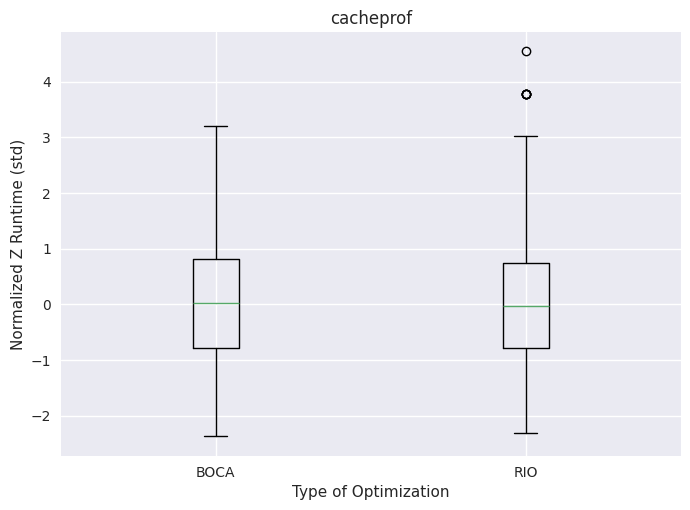

In [83]:
fig, ax = plt.subplots()

program_name = "cacheprof"

lst1 = []
labels = []
for type_name, t in program_tables[program_name].items():
    if type_name != "O2":
        lst1.append(t["Norm-Z"])
        labels.append(type_name)
    
ax.boxplot(lst1)
ax.set_xticklabels(labels)
ax.set_ylabel(f"Normalized Z Runtime (std)")
ax.set_xlabel(f"Type of Optimization")
ax.set_title(program_name)

plt.savefig("PO_Z_cacheprof.svg", format="svg")
plt.show()

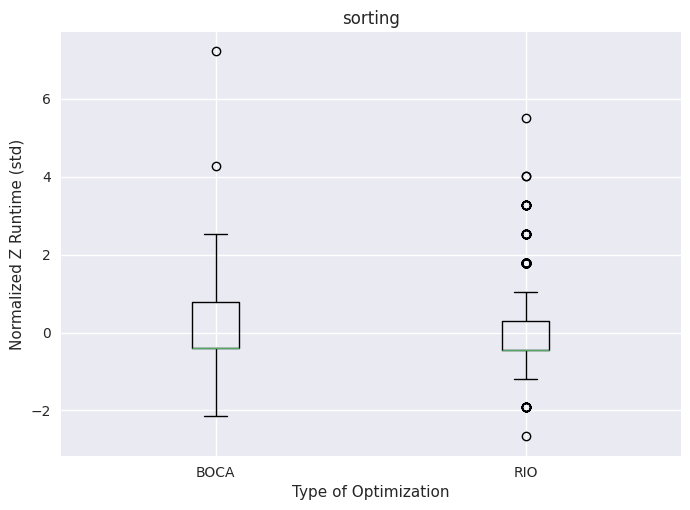

In [84]:
fig, ax = plt.subplots()

program_name = "sorting"

lst1 = []
labels = []
for type_name, t in program_tables[program_name].items():
    if type_name != "O2":
        lst1.append(t["Norm-Z"])
        labels.append(type_name)
    
ax.boxplot(lst1)
ax.set_xticklabels(labels)
ax.set_ylabel(f"Normalized Z Runtime (std)")
ax.set_xlabel(f"Type of Optimization")
ax.set_title(program_name)

plt.savefig("PO_Z_sorting.svg", format="svg")
plt.show()

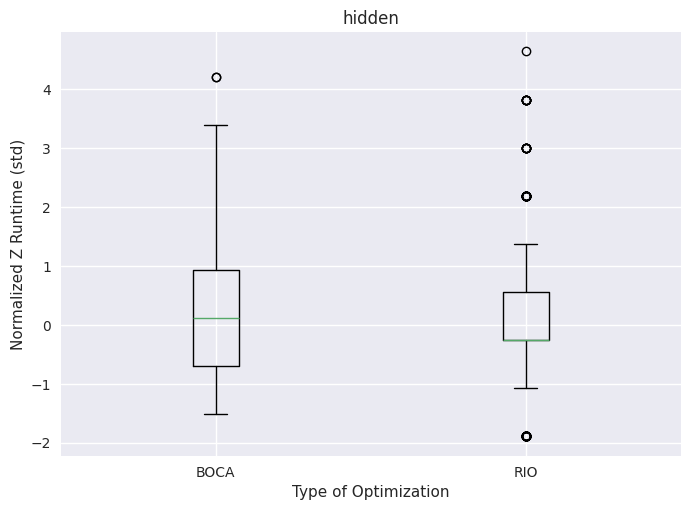

In [85]:
fig, ax = plt.subplots()

program_name = "hidden"

lst1 = []
labels = []
for type_name, t in program_tables[program_name].items():
    if type_name != "O2":
        lst1.append(t["Norm-Z"])
        labels.append(type_name)
    
ax.boxplot(lst1)
ax.set_xticklabels(labels)
ax.set_ylabel(f"Normalized Z Runtime (std)")
ax.set_xlabel(f"Type of Optimization")
ax.set_title(program_name)

plt.savefig("PO_Z_hidden.svg", format="svg")
plt.show()

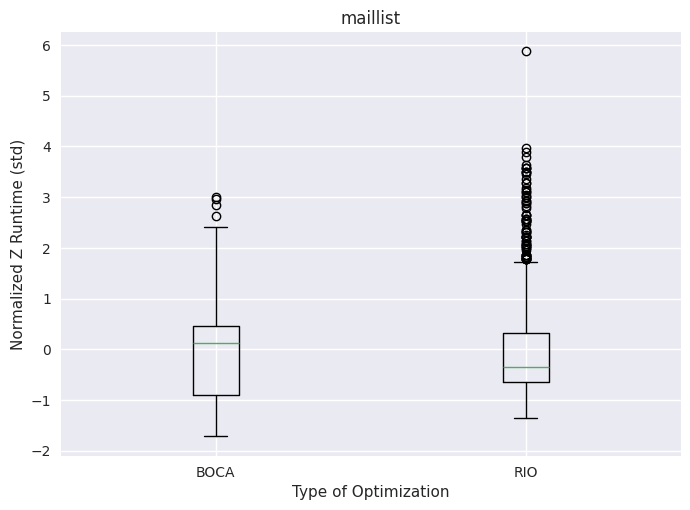

In [86]:
fig, ax = plt.subplots()

program_name = "maillist"

lst1 = []
labels = []
for type_name, t in program_tables[program_name].items():
    if type_name != "O2":
        lst1.append(t["Norm-Z"])
        labels.append(type_name)
    
ax.boxplot(lst1)
ax.set_xticklabels(labels)
ax.set_ylabel(f"Normalized Z Runtime (std)")
ax.set_xlabel(f"Type of Optimization")
ax.set_title(program_name)

plt.savefig("PO_Z_maillist.svg", format="svg")
plt.show()

### O2 Plots

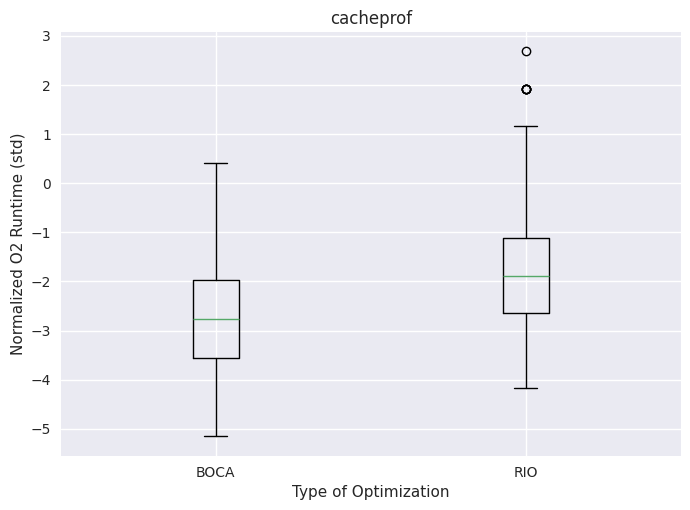

In [87]:
fig, ax = plt.subplots()

lst1 = []
labels = []
program_name = "cacheprof"
for type_name, t in program_tables[program_name].items():
    if type_name != "O2":
        lst1.append(t["Norm-Default"])
        labels.append(type_name)
    
ax.boxplot(lst1)
ax.set_xticklabels(labels)
ax.set_ylabel(f"Normalized O2 Runtime (std)")
ax.set_xlabel(f"Type of Optimization")
ax.set_title(f"{program_name}")

plt.savefig("PO_O2_cacheprof.svg", format="svg")
plt.show()

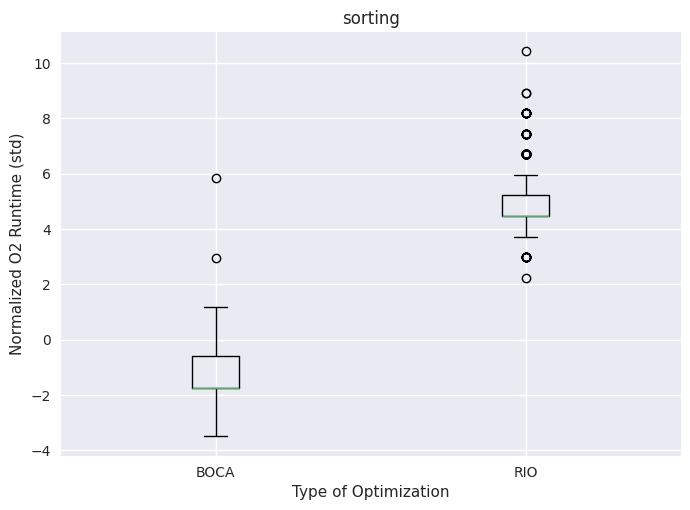

In [88]:
fig, ax = plt.subplots()

lst1 = []
labels = []
program_name = "sorting"
for type_name, t in program_tables[program_name].items():
    if type_name != "O2":
        lst1.append(t["Norm-Default"])
        labels.append(type_name)
    
ax.boxplot(lst1)
ax.set_xticklabels(labels)
ax.set_ylabel(f"Normalized O2 Runtime (std)")
ax.set_xlabel(f"Type of Optimization")
ax.set_title(f"{program_name}")

plt.savefig("PO_O2_sorting.svg", format="svg")
plt.show()

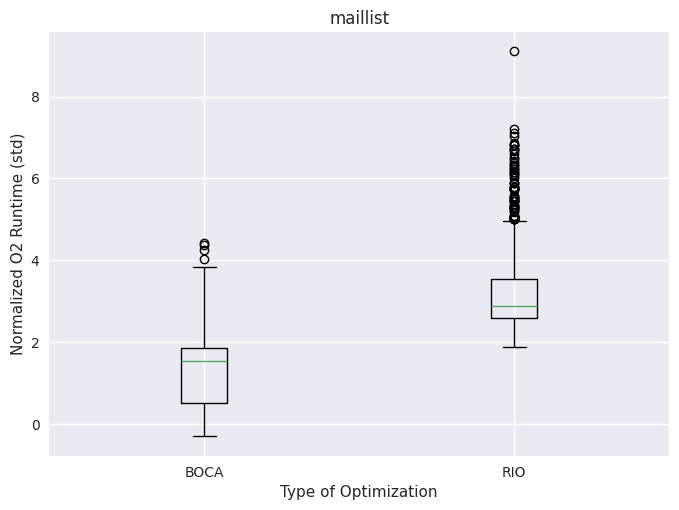

In [89]:
fig, ax = plt.subplots()

lst1 = []
labels = []
program_name = "maillist"
for type_name, t in program_tables[program_name].items():
    if type_name != "O2":
        lst1.append(t["Norm-Default"])
        labels.append(type_name)
    
ax.boxplot(lst1)
ax.set_xticklabels(labels)
ax.set_ylabel(f"Normalized O2 Runtime (std)")
ax.set_xlabel(f"Type of Optimization")
ax.set_title(f"{program_name}")

plt.savefig("PO_O2_maillist.svg", format="svg")
plt.show()

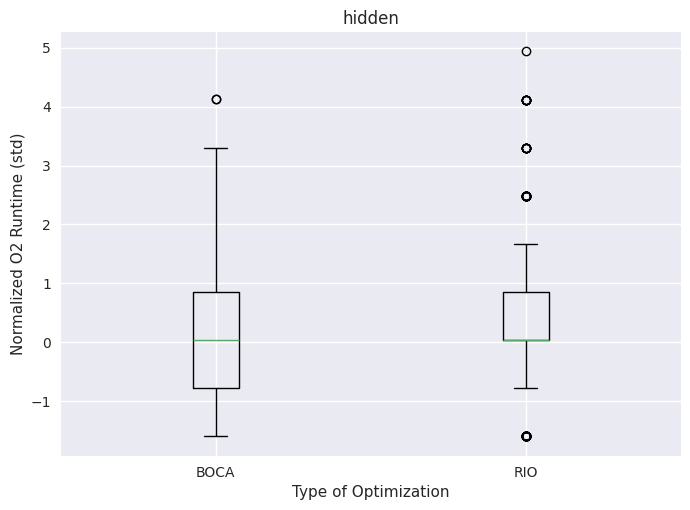

In [90]:
fig, ax = plt.subplots()

lst1 = []
labels = []
program_name = "hidden"
for type_name, t in program_tables[program_name].items():
    if type_name != "O2":
        lst1.append(t["Norm-Default"])
        labels.append(type_name)
    
ax.boxplot(lst1)
ax.set_xticklabels(labels)
ax.set_ylabel(f"Normalized O2 Runtime (std)")
ax.set_xlabel(f"Type of Optimization")
ax.set_title(f"{program_name}")

plt.savefig("PO_O2_hidden.svg", format="svg")
plt.show()

# Table of Improvement

In [91]:

# THIS IS USING THE BEST RUNTIME

data = []
programs = list(program_tables.keys())
configurations = ["BOCA", "RIO"]
columns = ["Optimal", "Default", "Improvement", "Avg. Improvement"]

for program in programs:
    program_data = []
    row_O0s = []
    row_O2s = []
    for config in configurations:
        if program_tables[program][config] is not None:
            row_Optimal = round(program_tables[program][config].sort_values("Runtime", ascending=True).iloc[0]["Runtime"],3)
            row_Default = round(program_tables[program]["O2"]["Runtime"].mean(),3)
            improvement = f"{round(-1*(1 - row_Optimal/row_Default)*100,3)}%"
            average = f"{round(-1*(1 - program_tables[program][config]['Runtime'].mean()/row_Default)*100,3)}%"
            program_data.append([row_Optimal, row_Default, improvement, average])
            row_O0s.append(row_Optimal)
            row_O2s.append(row_Default)
        else:
            program_data.append([None, None, None])
    data.extend(program_data)
    
    # for config in configurations:
    #     updated_program_tables[program][config]["-O0"]["Runtime"] = round(np.mean(row_O0s),3)
    #     row_O2 = updated_program_tables[program][config]["-O2"]["Runtime"] = round(np.mean(row_O2s),3)

# Create a MultiIndex with program and configuration levels
index = pd.MultiIndex.from_product([programs, configurations], names=["Program", "Configuration"])

# print(index)
# print(data)

# Reshape data into a DataFrame
df = pd.DataFrame(data, columns=columns)


# Assign the MultiIndex
df.index = index


print(df)
df.to_csv("PO_table_results.csv")


                         Optimal  Default Improvement Avg. Improvement
Program   Configuration                                               
cacheprof BOCA             0.112    0.118     -5.085%          -2.561%
          RIO              0.113    0.118     -4.237%          -1.669%
sorting   BOCA             0.141    0.147     -4.082%          -1.579%
          RIO              0.150    0.147      2.041%           4.481%
hidden    BOCA             0.126    0.128     -1.562%          -0.117%
          RIO              0.126    0.128     -1.562%           0.247%
maillist  BOCA             0.604    0.617     -2.107%          10.144%
          RIO              0.660    0.617      6.969%          11.945%


In [92]:
BOCA_Optimal = []
RIO_Optimal = []

for program, models in program_tables.items():
    for m, t in models.items():
        if m == "BOCA":
            BOCA_Optimal.append(program_tables[program][m].sort_values("Runtime", ascending=True).iloc[0]["Phase"])      
        elif m == "RIO":
            RIO_Optimal.append(program_tables[program][m].sort_values("Runtime", ascending=True).iloc[0]["Phase"])

# BOCA_Optimal.add program_tables["sorting"]["BOCA"].sort_values("Runtime", ascending=True).iloc[0]["Phase"]
# RIO_Optimal = program_tables["sorting"]["RIO"].sort_values("Runtime", ascending=True).iloc[0]["Phase"]


print(BOCA_Optimal)
print(RIO_Optimal)

['0|1|2|3|4|5|6|7|8|9|10|11|12|15|18|20|14|17|22|16|21|19|13', '0|1|2|3|4|5|6|7|8|9|10|11|12|21|17|19|16|14|15|20|22|13|18', '0|1|2|3|4|5|6|7|8|9|10|11|12|13|20|21|22|15|18|16|14|17|19', '0|1|2|3|4|5|6|7|8|9|10|11|12|17|13|14|16|19|21|15|22|20|18']
['0|1|2|3|4|5|6|7|8|9|10|11|12|13|21|19|16|22|17|14|15|18|20', '0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|17|21|18|20|22|19|16', '0|1|2|3|4|5|6|7|8|9|10|11|12|13|16|20|19|14|17|15|18|22|21', '0|1|2|3|4|5|6|7|8|9|10|11|12|13|21|16|18|20|15|14|22|19|17']


# Correctness Stuff

In [93]:
def has_required_tuples(tuple_list):
    for tup in  [("my_good_optimization", "my_neutral_optimization"), ("my_bad_optimization", "my_neutral_optimization")]:
        if tup in tuple_list:
            return True
    return False

def which_tuple(tuple_list):
    if ("my_good_optimization", "my_neutral_optimization") in tuple_list and ("my_bad_optimization", "my_neutral_optimization") in tuple_list:
        return "Both"
    elif ("my_good_optimization", "my_neutral_optimization") in tuple_list:
        return "Good Only"
    elif ("my_bad_optimization", "my_neutral_optimization") in tuple_list:
        return "Bad Only"
    else:
        return "Neither"

## Plot 1

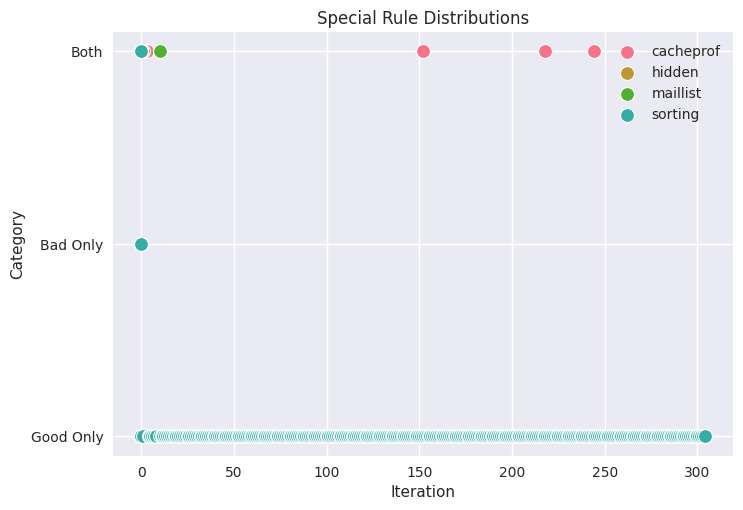

In [94]:

colors = ["blue", "red", "purple"]

# Scatter plot

count = 0
for program_name, df in correctness_tables.items():
    df_temp = df[["Iteration", "Rules", "Runtime"]]
    df_temp["Rules"] = df_temp["Rules"].apply(ast.literal_eval)
    filtered_df = df_temp[df_temp['Rules'].apply(has_required_tuples)]
    filtered_df["Rules"] = filtered_df["Rules"].apply(which_tuple)
    sns.scatterplot(x=filtered_df["Iteration"], y=filtered_df["Rules"], marker='o', color=sns.color_palette("husl")[count % 4], sizes=(0, 10), s=100, label=program_name)
    count += 1

# Add labels and title
plt.xlabel('Iteration')
plt.ylabel('Category')
plt.title('Special Rule Distributions')

# Show the legend
plt.legend()

# Show the plot
plt.savefig('Slow_Scatter.png')
plt.show()


## Plot 2

In [95]:
def weird_apply(iteration, df, category):
    training_set = df[df["Iteration"] <= iteration]
    total_size = training_set.count()
    groups = training_set.groupby("Rules")
    both_rule = groups.size()["Both"] if "Both" in groups.groups else 0
    good_rule = groups.size()["Good Only"] + both_rule if "Good Only" in groups.groups else 0
    bad_rule = groups.size()["Bad Only"] + both_rule if "Bad Only" in groups.groups else 0
    good_rule = good_rule / total_size
    bad_rule = bad_rule / total_size
    if category == "Good Only":
        return good_rule
    else:
        return bad_rule

### 10%

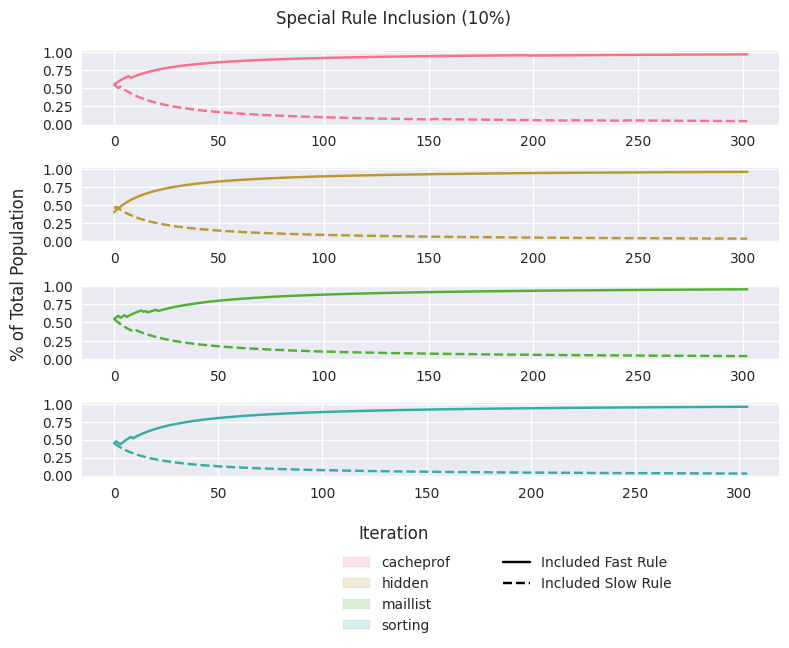

In [96]:
fig, axes = plt.subplots(4, 1)
colors = ["blue", "red", "purple"]
# labels = ["Both", "Slow", "Fast"]

# Scatter plot

count = 0
handles = []  # Collect handles from all scatter plots
labels = []   # Collect labels from all scatter plots
for program_name, df in correctness_tables.items():
    df_temp = df[["Iteration", "Rules", "Runtime"]]
    df_temp["Rules"] = df_temp["Rules"].apply(ast.literal_eval)
    #filtered_df = df_temp[df_temp['Rules'].apply(has_required_tuples)]
    filtered_df = df_temp.copy()
    filtered_df["Rules"] = filtered_df["Rules"].apply(which_tuple)

    filtered_df["PercentGood"] = filtered_df["Iteration"].apply(weird_apply, df=filtered_df, category="Good Only")["Iteration"]
    filtered_df["PercentBad"] = filtered_df["Iteration"].apply(weird_apply, df=filtered_df, category="Bad Only")["Iteration"]
    
    count_2 = 0
    filtered_df = filtered_df.sort_values("Rules", ascending=True)
    scatter = sns.lineplot(x=filtered_df["Iteration"], y=filtered_df["PercentGood"], color=sns.color_palette("husl")[count % 4], sizes=(0, 10), label=program_name, ax=axes[count], legend=False)
    scatter = sns.lineplot(x=filtered_df["Iteration"], y=filtered_df["PercentBad"], linestyle='--', color=sns.color_palette("husl")[count % 4], sizes=(0, 10), label=program_name, ax=axes[count], legend=False)
    handles.append(scatter.collections[0])  # Append handle for legend
    labels.append(program_name)  # Append label for legend
    count_2 += 1
        
    # Set custom y-axis labels
    # y_labels = filtered_df["Rules"].unique()
    # axes[count].set_yticks(range(len(y_labels)))
    # axes[count].set_yticklabels(y_labels)
    
    axes[count].set_title(None)
    axes[count].set_xlabel(None)
    axes[count].set_ylabel(None)
    axes[count].set_yticks([i/4 for i in range(5)])
    
    # Adjust y-axis limits to prevent clipping of markers
    # y_min = -0.5  # Add some padding at the bottom
    # y_max = len(y_labels) - 0.5  # Adjust based on the number of categories
    # axes[count].set_ylim(y_min, y_max)
    count += 1

# Add labels and title
# plt.xlabel('Iteration')
# plt.ylabel('Category')
fig.supxlabel('Iteration')
fig.supylabel('% of Total Population')
fig.suptitle("Special Rule Inclusion (10%)")

# Show the legend
# handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.42, 0.01))

legend_elements = [
    Line2D([0], [0], linestyle='-', color='k', label='Included Fast Rule'),
    Line2D([0], [0], linestyle='--', color='k', label='Included Slow Rule')
]

fig.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(0.62, 0.01))
# plt.legend(title="Y-Values", labels=["Value 0", "Value 1", "Value 2"])

# Show the plot
fig.tight_layout()
plt.savefig('Distribution_Scatter_Line.png', bbox_inches='tight')
plt.show()


### 5%

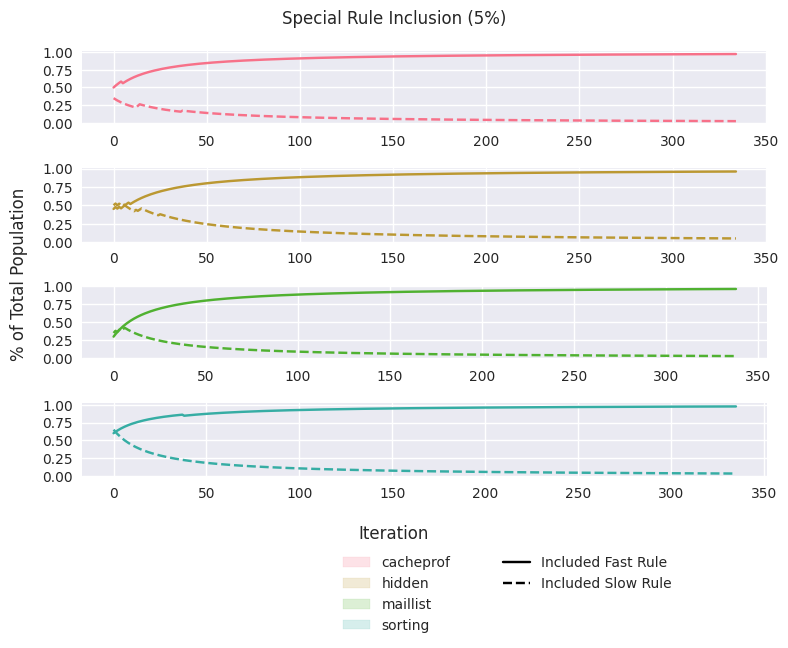

In [97]:
fig, axes = plt.subplots(4, 1)
colors = ["blue", "red", "purple"]
# labels = ["Both", "Slow", "Fast"]

# Scatter plot

count = 0
handles = []  # Collect handles from all scatter plots
labels = []   # Collect labels from all scatter plots
for program_name, df in correctness_tables_5p.items():
    df_temp = df[["Iteration", "Rules", "Runtime"]]
    df_temp["Rules"] = df_temp["Rules"].apply(ast.literal_eval)
    #filtered_df = df_temp[df_temp['Rules'].apply(has_required_tuples)]
    filtered_df = df_temp.copy()
    filtered_df["Rules"] = filtered_df["Rules"].apply(which_tuple)

    filtered_df["PercentGood"] = filtered_df["Iteration"].apply(weird_apply, df=filtered_df, category="Good Only")["Iteration"]
    filtered_df["PercentBad"] = filtered_df["Iteration"].apply(weird_apply, df=filtered_df, category="Bad Only")["Iteration"]
    
    count_2 = 0
    filtered_df = filtered_df.sort_values("Rules", ascending=True)
    scatter = sns.lineplot(x=filtered_df["Iteration"], y=filtered_df["PercentGood"], color=sns.color_palette("husl")[count % 4], sizes=(0, 10), label=program_name, ax=axes[count], legend=False)
    scatter = sns.lineplot(x=filtered_df["Iteration"], y=filtered_df["PercentBad"], linestyle='--', color=sns.color_palette("husl")[count % 4], sizes=(0, 10), label=program_name, ax=axes[count], legend=False)
    handles.append(scatter.collections[0])  # Append handle for legend
    labels.append(program_name)  # Append label for legend
    count_2 += 1
        
    # Set custom y-axis labels
    # y_labels = filtered_df["Rules"].unique()
    # axes[count].set_yticks(range(len(y_labels)))
    # axes[count].set_yticklabels(y_labels)
    
    axes[count].set_title(None)
    axes[count].set_xlabel(None)
    axes[count].set_ylabel(None)
    axes[count].set_yticks([i/4 for i in range(5)])
    
    # Adjust y-axis limits to prevent clipping of markers
    # y_min = -0.5  # Add some padding at the bottom
    # y_max = len(y_labels) - 0.5  # Adjust based on the number of categories
    # axes[count].set_ylim(y_min, y_max)
    count += 1

# Add labels and title
# plt.xlabel('Iteration')
# plt.ylabel('Category')
fig.supxlabel('Iteration')
fig.supylabel('% of Total Population')
fig.suptitle("Special Rule Inclusion (5%)")

# Show the legend
# handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.42, 0.01))

legend_elements = [
    Line2D([0], [0], linestyle='-', color='k', label='Included Fast Rule'),
    Line2D([0], [0], linestyle='--', color='k', label='Included Slow Rule')
]

fig.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(0.62, 0.01))
# plt.legend(title="Y-Values", labels=["Value 0", "Value 1", "Value 2"])

# Show the plot
fig.tight_layout()
plt.savefig('Distribution_Scatter_Line_5p.png', bbox_inches='tight')
plt.show()

### 1%

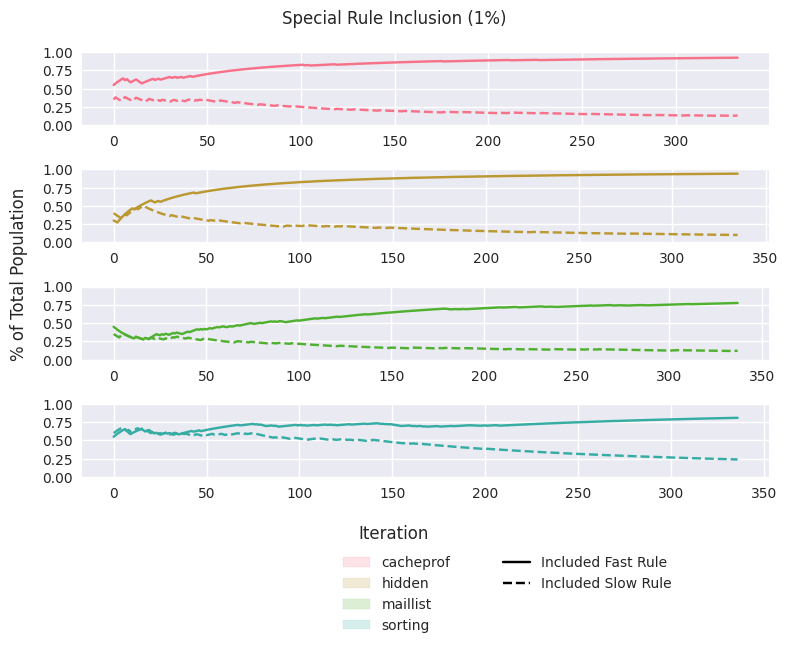

In [98]:
fig, axes = plt.subplots(4, 1)
colors = ["blue", "red", "purple"]
# labels = ["Both", "Slow", "Fast"]

# Scatter plot

count = 0
handles = []  # Collect handles from all scatter plots
labels = []   # Collect labels from all scatter plots
for program_name, df in correctness_tables_1p.items():
    df_temp = df[["Iteration", "Rules", "Runtime"]]
    df_temp["Rules"] = df_temp["Rules"].apply(ast.literal_eval)
    #filtered_df = df_temp[df_temp['Rules'].apply(has_required_tuples)]
    filtered_df = df_temp.copy()
    filtered_df["Rules"] = filtered_df["Rules"].apply(which_tuple)

    filtered_df["PercentGood"] = filtered_df["Iteration"].apply(weird_apply, df=filtered_df, category="Good Only")["Iteration"]
    filtered_df["PercentBad"] = filtered_df["Iteration"].apply(weird_apply, df=filtered_df, category="Bad Only")["Iteration"]
    
    count_2 = 0
    filtered_df = filtered_df.sort_values("Rules", ascending=True)
    scatter = sns.lineplot(x=filtered_df["Iteration"], y=filtered_df["PercentGood"], color=sns.color_palette("husl")[count % 4], sizes=(0, 10), label=program_name, ax=axes[count], legend=False)
    scatter = sns.lineplot(x=filtered_df["Iteration"], y=filtered_df["PercentBad"], linestyle='--', color=sns.color_palette("husl")[count % 4], sizes=(0, 10), label=program_name, ax=axes[count], legend=False)
    handles.append(scatter.collections[0])  # Append handle for legend
    labels.append(program_name)  # Append label for legend
    count_2 += 1
        
    # Set custom y-axis labels
    # y_labels = filtered_df["Rules"].unique()
    # axes[count].set_yticks(range(len(y_labels)))
    # axes[count].set_yticklabels(y_labels)
    
    axes[count].set_title(None)
    axes[count].set_xlabel(None)
    axes[count].set_ylabel(None)
    axes[count].set_yticks([i/4 for i in range(5)])
    
    # Adjust y-axis limits to prevent clipping of markers
    # y_min = -0.5  # Add some padding at the bottom
    # y_max = len(y_labels) - 0.5  # Adjust based on the number of categories
    # axes[count].set_ylim(y_min, y_max)
    count += 1

# Add labels and title
# plt.xlabel('Iteration')
# plt.ylabel('Category')
fig.supxlabel('Iteration')
fig.supylabel('% of Total Population')
fig.suptitle("Special Rule Inclusion (1%)")

# Show the legend
# handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.42, 0.01))

legend_elements = [
    Line2D([0], [0], linestyle='-', color='k', label='Included Fast Rule'),
    Line2D([0], [0], linestyle='--', color='k', label='Included Slow Rule')
]

fig.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(0.62, 0.01))
# plt.legend(title="Y-Values", labels=["Value 0", "Value 1", "Value 2"])

# Show the plot
fig.tight_layout()
plt.savefig('Distribution_Scatter_Line_1p.png', bbox_inches='tight')
plt.show()

### 0.5%

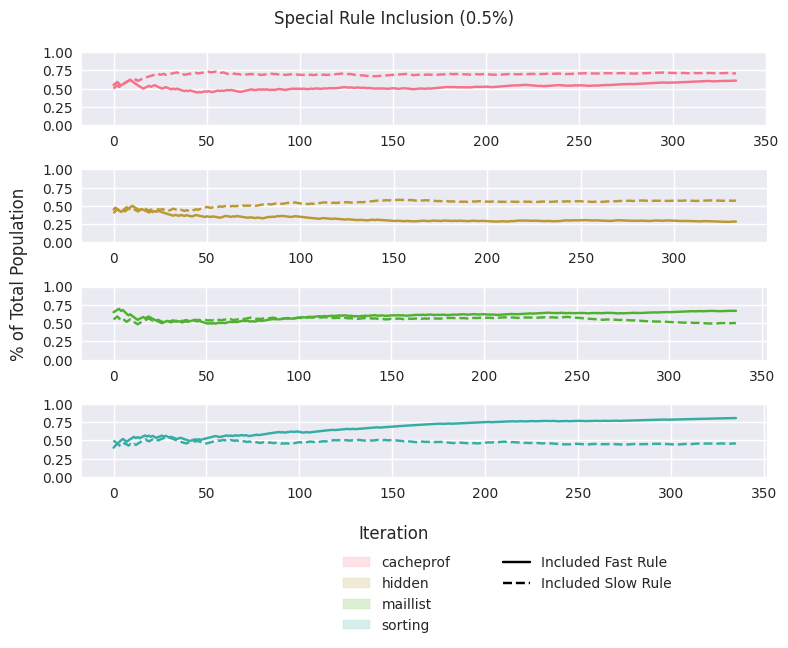

In [99]:
fig, axes = plt.subplots(4, 1)
colors = ["blue", "red", "purple"]
# labels = ["Both", "Slow", "Fast"]

# Scatter plot

count = 0
handles = []  # Collect handles from all scatter plots
labels = []   # Collect labels from all scatter plots
for program_name, df in correctness_tables_005p.items():
    df_temp = df[["Iteration", "Rules", "Runtime"]]
    df_temp["Rules"] = df_temp["Rules"].apply(ast.literal_eval)
    #filtered_df = df_temp[df_temp['Rules'].apply(has_required_tuples)]
    filtered_df = df_temp.copy()
    filtered_df["Rules"] = filtered_df["Rules"].apply(which_tuple)

    filtered_df["PercentGood"] = filtered_df["Iteration"].apply(weird_apply, df=filtered_df, category="Good Only")["Iteration"]
    filtered_df["PercentBad"] = filtered_df["Iteration"].apply(weird_apply, df=filtered_df, category="Bad Only")["Iteration"]
    
    count_2 = 0
    filtered_df = filtered_df.sort_values("Rules", ascending=True)
    scatter = sns.lineplot(x=filtered_df["Iteration"], y=filtered_df["PercentGood"], color=sns.color_palette("husl")[count % 4], sizes=(0, 10), label=program_name, ax=axes[count], legend=False)
    scatter = sns.lineplot(x=filtered_df["Iteration"], y=filtered_df["PercentBad"], linestyle='--', color=sns.color_palette("husl")[count % 4], sizes=(0, 10), label=program_name, ax=axes[count], legend=False)
    handles.append(scatter.collections[0])  # Append handle for legend
    labels.append(program_name)  # Append label for legend
    count_2 += 1
        
    # Set custom y-axis labels
    # y_labels = filtered_df["Rules"].unique()
    # axes[count].set_yticks(range(len(y_labels)))
    # axes[count].set_yticklabels(y_labels)
    
    axes[count].set_title(None)
    axes[count].set_xlabel(None)
    axes[count].set_ylabel(None)
    axes[count].set_yticks([i/4 for i in range(5)])
    
    # Adjust y-axis limits to prevent clipping of markers
    # y_min = -0.5  # Add some padding at the bottom
    # y_max = len(y_labels) - 0.5  # Adjust based on the number of categories
    # axes[count].set_ylim(y_min, y_max)
    count += 1

# Add labels and title
# plt.xlabel('Iteration')
# plt.ylabel('Category')
fig.supxlabel('Iteration')
fig.supylabel('% of Total Population')
fig.suptitle("Special Rule Inclusion (0.5%)")

# Show the legend
# handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.42, 0.01))

legend_elements = [
    Line2D([0], [0], linestyle='-', color='k', label='Included Fast Rule'),
    Line2D([0], [0], linestyle='--', color='k', label='Included Slow Rule')
]

fig.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(0.62, 0.01))
# plt.legend(title="Y-Values", labels=["Value 0", "Value 1", "Value 2"])

# Show the plot
fig.tight_layout()
plt.savefig('Distribution_Scatter_Line_005p.png', bbox_inches='tight')
plt.show()

## Multi-Rule Test (0.5% Each)

In [100]:
def has_required_tuples_multi(tuple_list):
    for tup in  [("my_good_optimization", "my_neutral_optimization"), ("my_good_optimization_2", "my_neutral_optimization"), ("my_good_optimization_3", "my_neutral_optimization"), ("my_good_optimization_4", "my_neutral_optimization"), ("my_good_optimization_5", "my_neutral_optimization"), ("my_good_optimization_6", "my_neutral_optimization")]:
        if tup in tuple_list:
            return True
    return False

def which_tuple_multi(tuple_list):
    intersection_list = list(set(tuple_list).intersection(set([("my_good_optimization", "my_neutral_optimization"), ("my_good_optimization_2", "my_neutral_optimization"), ("my_good_optimization_3", "my_neutral_optimization"), ("my_good_optimization_4", "my_neutral_optimization"), ("my_good_optimization_5", "my_neutral_optimization"), ("my_good_optimization_6", "my_neutral_optimization")])))
    return len(intersection_list)

# def weird_apply_multi(iteration, df):
#     training_set = df[df["Iteration"] <= iteration]
#     total_size = training_set.count()
#     groups = training_set.groupby("Rules")
#     rule_0 = (groups.size()["0"] if "0" in groups.groups else 0) / total_size
#     rule_1 = (groups.size()["1"] if "1" in groups.groups else 0) / total_size
#     rule_2 = (groups.size()["2"] if "2" in groups.groups else 0) / total_size
#     rule_3 = (groups.size()["3"] if "3" in groups.groups else 0) / total_size
#     rule_4 = (groups.size()["4"] if "4" in groups.groups else 0) / total_size
#     rule_5 = (groups.size()["5"] if "5" in groups.groups else 0) / total_size
#     rule_6 = (groups.size()["6"] if "6" in groups.groups else 0) / total_size
    # if category == "Good Only":
    #     return good_rule
    # else:
    #     return bad_rule

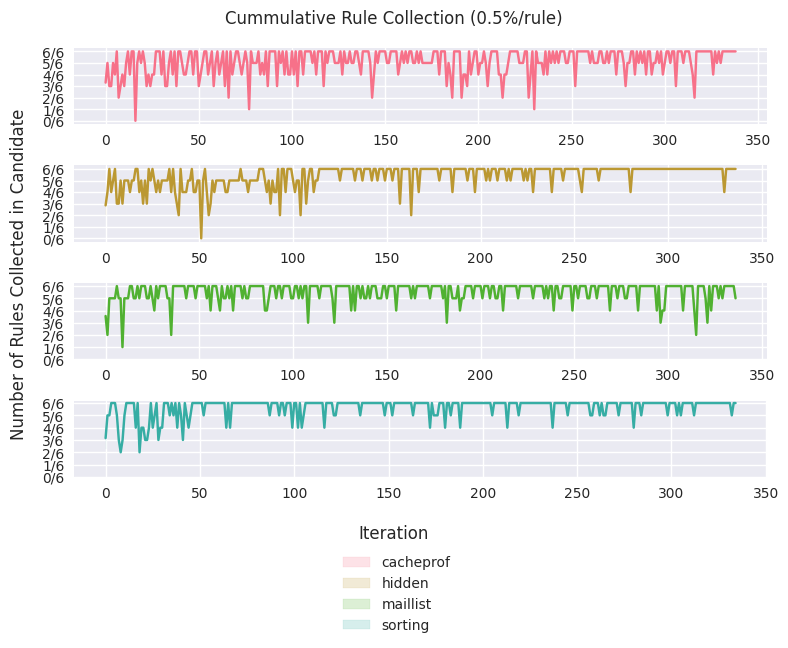

In [101]:
fig, axes = plt.subplots(4, 1)
colors = ["blue", "red", "purple"]
# labels = ["Both", "Slow", "Fast"]

# Scatter plot

count = 0
handles = []  # Collect handles from all scatter plots
labels = []   # Collect labels from all scatter plots
for program_name, df in correctness_tables_multi.items():
    df_temp = df[["Iteration", "Rules", "Runtime"]]
    df_temp["Rules"] = df_temp["Rules"].apply(ast.literal_eval)
    #filtered_df = df_temp[df_temp['Rules'].apply(has_required_tuples)]
    filtered_df = df_temp.copy()
    filtered_df["Rules"] = filtered_df["Rules"].apply(which_tuple_multi)
    filtered_df["Rules"] = filtered_df["Rules"]/6
    # print(filtered_df)
    # filtered_df["PercentCollected"] = filtered_df["Iteration"].apply(weird_apply_multi, df=filtered_df)["Iteration"]
    filtered_df["PercentCollected"] = filtered_df["Rules"]
    # filtered_df["PercentBad"] = filtered_df["Iteration"].apply(weird_apply, df=filtered_df, category="Bad Only")["Iteration"]
    
    count_2 = 0
    filtered_df = filtered_df.sort_values("Rules", ascending=True)
    scatter = sns.lineplot(x=filtered_df["Iteration"], y=filtered_df["PercentCollected"], color=sns.color_palette("husl")[count % 4], sizes=(0, 10), label=program_name, ax=axes[count], legend=False)
    # scatter = sns.lineplot(x=filtered_df["Iteration"], y=filtered_df["PercentBad"], linestyle='--', color=sns.color_palette("husl")[count % 4], sizes=(0, 10), label=program_name, ax=axes[count], legend=False)
    handles.append(scatter.collections[0])  # Append handle for legend
    labels.append(program_name)  # Append label for legend
    count_2 += 1
        
    # Set custom y-axis labels
    # y_labels = filtered_df["Rules"].unique()
    # axes[count].set_yticks(range(len(y_labels)))
    # axes[count].set_yticklabels(y_labels)
    
    axes[count].set_title(None)
    axes[count].set_xlabel(None)
    axes[count].set_ylabel(None)
    ticks = [i/6 for i in range(7)]
    tick_labels = [f'{i}/6' for i in range(7)]
    
    axes[count].set_yticks(ticks)
    axes[count].set_yticklabels(tick_labels)
    
    # Adjust y-axis limits to prevent clipping of markers
    # y_min = -0.5  # Add some padding at the bottom
    # y_max = len(y_labels) - 0.5  # Adjust based on the number of categories
    # axes[count].set_ylim(y_min, y_max)
    count += 1

# Add labels and title
# plt.xlabel('Iteration')
# plt.ylabel('Category')
fig.supxlabel('Iteration')
fig.supylabel('Number of Rules Collected in Candidate')
fig.suptitle("Cummulative Rule Collection (0.5%/rule)")

# Show the legend
# handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.42, 0.01))

# legend_elements = [
#     Line2D([0], [0], linestyle='-', color='k', label='Included Fast Rule'),
#     Line2D([0], [0], linestyle='--', color='k', label='Included Slow Rule')
# ]

# fig.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(0.62, 0.01))
# plt.legend(title="Y-Values", labels=["Value 0", "Value 1", "Value 2"])

# Show the plot
fig.tight_layout()
plt.savefig('Distribution_Scatter_Line_Multi.png', bbox_inches='tight')
plt.show()

## Multi-Rule Test (1% Each)

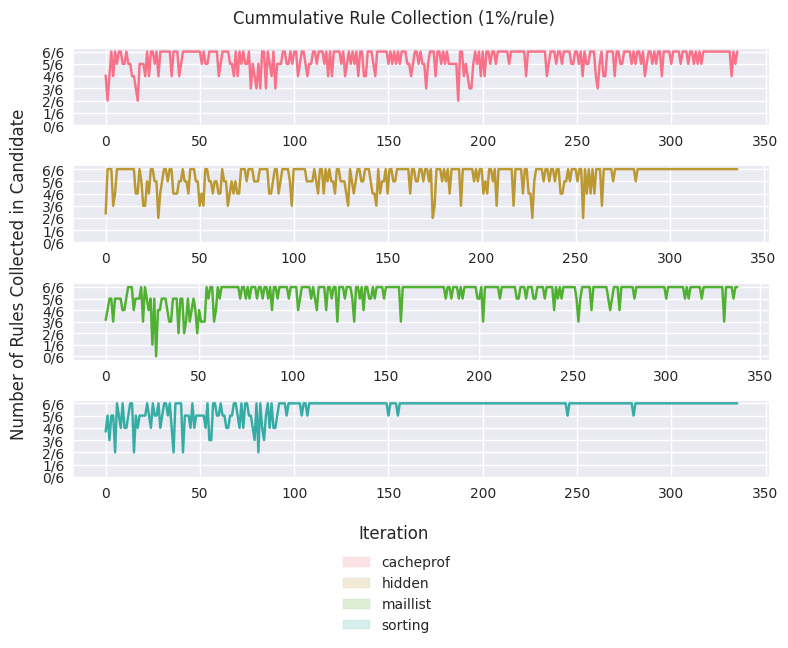

In [102]:
fig, axes = plt.subplots(4, 1)
colors = ["blue", "red", "purple"]
# labels = ["Both", "Slow", "Fast"]

# Scatter plot

count = 0
handles = []  # Collect handles from all scatter plots
labels = []   # Collect labels from all scatter plots
for program_name, df in correctness_tables_multi_1p.items():
    df_temp = df[["Iteration", "Rules", "Runtime"]]
    df_temp["Rules"] = df_temp["Rules"].apply(ast.literal_eval)
    #filtered_df = df_temp[df_temp['Rules'].apply(has_required_tuples)]
    filtered_df = df_temp.copy()
    filtered_df["Rules"] = filtered_df["Rules"].apply(which_tuple_multi)
    filtered_df["Rules"] = filtered_df["Rules"]/6
    # print(filtered_df)
    # filtered_df["PercentCollected"] = filtered_df["Iteration"].apply(weird_apply_multi, df=filtered_df)["Iteration"]
    filtered_df["PercentCollected"] = filtered_df["Rules"]
    # filtered_df["PercentBad"] = filtered_df["Iteration"].apply(weird_apply, df=filtered_df, category="Bad Only")["Iteration"]
    
    count_2 = 0
    filtered_df = filtered_df.sort_values("Rules", ascending=True)
    scatter = sns.lineplot(x=filtered_df["Iteration"], y=filtered_df["PercentCollected"], color=sns.color_palette("husl")[count % 4], sizes=(0, 10), label=program_name, ax=axes[count], legend=False)
    # scatter = sns.lineplot(x=filtered_df["Iteration"], y=filtered_df["PercentBad"], linestyle='--', color=sns.color_palette("husl")[count % 4], sizes=(0, 10), label=program_name, ax=axes[count], legend=False)
    handles.append(scatter.collections[0])  # Append handle for legend
    labels.append(program_name)  # Append label for legend
    count_2 += 1
        
    # Set custom y-axis labels
    # y_labels = filtered_df["Rules"].unique()
    # axes[count].set_yticks(range(len(y_labels)))
    # axes[count].set_yticklabels(y_labels)
    
    axes[count].set_title(None)
    axes[count].set_xlabel(None)
    axes[count].set_ylabel(None)
    ticks = [i/6 for i in range(7)]
    tick_labels = [f'{i}/6' for i in range(7)]
    
    axes[count].set_yticks(ticks)
    axes[count].set_yticklabels(tick_labels)
    
    # Adjust y-axis limits to prevent clipping of markers
    # y_min = -0.5  # Add some padding at the bottom
    # y_max = len(y_labels) - 0.5  # Adjust based on the number of categories
    # axes[count].set_ylim(y_min, y_max)
    count += 1

# Add labels and title
# plt.xlabel('Iteration')
# plt.ylabel('Category')
fig.supxlabel('Iteration')
fig.supylabel('Number of Rules Collected in Candidate')
fig.suptitle("Cummulative Rule Collection (1%/rule)")

# Show the legend
# handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.42, 0.01))

# legend_elements = [
#     Line2D([0], [0], linestyle='-', color='k', label='Included Fast Rule'),
#     Line2D([0], [0], linestyle='--', color='k', label='Included Slow Rule')
# ]

# fig.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(0.62, 0.01))
# plt.legend(title="Y-Values", labels=["Value 0", "Value 1", "Value 2"])

# Show the plot
fig.tight_layout()
plt.savefig('Distribution_Scatter_Line_Multi.png', bbox_inches='tight')
plt.show()

## Multi-Rule Impact Test

### Classic

In [103]:
sorting_impact = pd.read_csv(f"{dir_path}/sorting-PHASEORDER-BOCA-SORTING_IMPACT_TEST-0.csv", index_col=[0])
sorting_impact = sorting_impact.dropna()

    Iteration                                              Rules  \
20          1  [(static_args, presimplify), (static_args, spe...   
21          2  [(static_args, presimplify), (static_args, spe...   
22          3  [(static_args, presimplify), (static_args, spe...   
23          4  [(static_args, presimplify), (static_args, spe...   
24          5  [(static_args, presimplify), (static_args, spe...   

    Impactful Rules   Runtime  
20                0  0.144988  
21                0  0.148892  
22                0  0.145929  
23                0  0.146452  
24                0  0.144046  


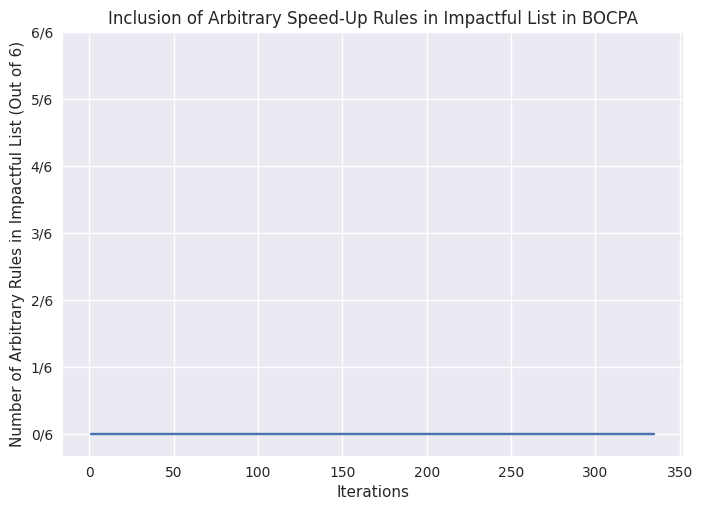

In [104]:
fix, ax = plt.subplots()

colors = ["blue", "red", "purple"]
# labels = ["Both", "Slow", "Fast"]

# Scatter plot

count = 0
handles = []  # Collect handles from all scatter plots
labels = []   # Collect labels from all scatter plots
df_temp = sorting_impact[["Iteration", "Rules", "Impactful Rules", "Runtime"]]
df_temp["Rules"] = df_temp["Rules"].apply(ast.literal_eval)
df_temp["Impactful Rules"] = df_temp["Impactful Rules"].apply(ast.literal_eval)

filtered_df = df_temp.copy()
filtered_df["Impactful Rules"] = filtered_df["Impactful Rules"].apply(which_tuple_multi)
print(filtered_df.head())
# print(filtered_df)
# filtered_df["PercentCollected"] = filtered_df["Iteration"].apply(weird_apply_multi, df=filtered_df)["Iteration"]
# filtered_df["PercentCollected"] = filtered_df["Rules"]
# filtered_df["PercentBad"] = filtered_df["Iteration"].apply(weird_apply, df=filtered_df, category="Bad Only")["Iteration"]

count_2 = 0
filtered_df = filtered_df.sort_values("Rules", ascending=True)
line = sns.lineplot(x=filtered_df["Iteration"], y=filtered_df["Impactful Rules"], sizes=(0, 10))
# scatter = sns.lineplot(x=filtered_df["Iteration"], y=filtered_df["PercentBad"], linestyle='--', color=sns.color_palette("husl")[count % 4], sizes=(0, 10), label=program_name, ax=axes[count], legend=False)
# handles.append(scatter.collections[0])  # Append handle for legend
# labels.append(program_name)  # Append label for legend
# count_2 += 1
    
# Set custom y-axis labels
# y_labels = filtered_df["Rules"].unique()
# axes[count].set_yticks(range(len(y_labels)))
# axes[count].set_yticklabels(y_labels)

ax.set_title("Inclusion of Arbitrary Speed-Up Rules in Impactful List in BOCPA")
ax.set_xlabel("Iterations")
ax.set_ylabel("Number of Arbitrary Rules in Impactful List (Out of 6)")
ticks = [i/6 for i in range(7)]
tick_labels = [f'{i}/6' for i in range(7)]

ax.set_yticks(ticks)
ax.set_yticklabels(tick_labels)

# count += 1

# Add labels and title
# plt.xlabel('Iteration')
# plt.ylabel('Category')
# fig.supxlabel('Iteration')
# fig.supylabel('Number of Rules Collected in Candidate')
# fig.suptitle("Cummulative Rule Collection (1%/rule)")

# Show the legend
# handles, labels = axes[0].get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.42, 0.01))

# legend_elements = [
#     Line2D([0], [0], linestyle='-', color='k', label='Included Fast Rule'),
#     Line2D([0], [0], linestyle='--', color='k', label='Included Slow Rule')
# ]

# fig.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(0.62, 0.01))
# plt.legend(title="Y-Values", labels=["Value 0", "Value 1", "Value 2"])

# Show the plot
fig.tight_layout()
plt.savefig('Sorting_Multi_Impactful_List_Test_Plot.png', bbox_inches='tight')
plt.show()

# which_tuple_multi

### Small Intial Set

In [105]:
sorting_impact = pd.read_csv(f"{dir_path}/sorting-PHASEORDER-BOCA-SORTING_IMPACT_TEST_SMALL_INITIAL-0.csv", index_col=[0])
sorting_impact = sorting_impact.dropna()

   Iteration                                              Rules  \
1          1  [(static_args, presimplify), (static_args, spe...   
2          2  [(static_args, presimplify), (static_args, spe...   
3          3  [(static_args, presimplify), (static_args, spe...   
4          4  [(static_args, presimplify), (static_args, spe...   
5          5  [(static_args, presimplify), (static_args, spe...   

   Impactful Rules   Runtime  
1                0  0.150935  
2                0  0.152896  
3                0  0.153000  
4                0  0.148456  
5                0  0.144046  


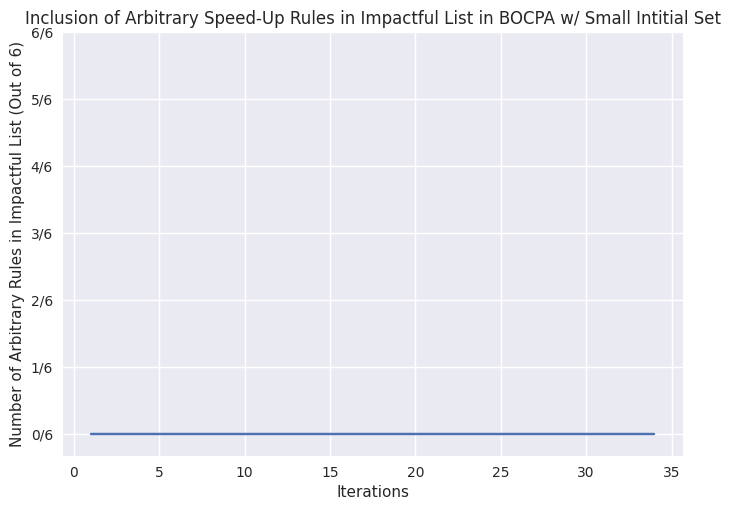

In [106]:
fix, ax = plt.subplots()

colors = ["blue", "red", "purple"]
# labels = ["Both", "Slow", "Fast"]

# Scatter plot

count = 0
handles = []  # Collect handles from all scatter plots
labels = []   # Collect labels from all scatter plots
df_temp = sorting_impact[["Iteration", "Rules", "Impactful Rules", "Runtime"]]
df_temp["Rules"] = df_temp["Rules"].apply(ast.literal_eval)
df_temp["Impactful Rules"] = df_temp["Impactful Rules"].apply(ast.literal_eval)

filtered_df = df_temp.copy()
filtered_df["Impactful Rules"] = filtered_df["Impactful Rules"].apply(which_tuple_multi)
print(filtered_df.head())


count_2 = 0
filtered_df = filtered_df.sort_values("Rules", ascending=True)
line = sns.lineplot(x=filtered_df["Iteration"], y=filtered_df["Impactful Rules"], sizes=(0, 10))
# Set custom y-axis labels
ax.set_title("Inclusion of Arbitrary Speed-Up Rules in Impactful List in BOCPA w/ Small Intitial Set")
ax.set_xlabel("Iterations")
ax.set_ylabel("Number of Arbitrary Rules in Impactful List (Out of 6)")
ticks = [i/6 for i in range(7)]
tick_labels = [f'{i}/6' for i in range(7)]

ax.set_yticks(ticks)
ax.set_yticklabels(tick_labels)

# count += 1

# Show the plot
fig.tight_layout()
plt.savefig('Sorting_Small_Init_Multi_Impactful_List_Test_Plot.png', bbox_inches='tight')
plt.show()

# which_tuple_multi

# Shared Rules

In [107]:
good_rules = ["liberate_case","spec_constr","rule_check2","late_specialise","triple_combo","late_dmd_anal","strict_anal","rule_check3","add_caller","add_late"]
bad_rules = ["static_args","presimplify","specialise","full_laziness_1","simpl3","float_in_1","call_arity","strictness","exitification","full_laziness_2","cse","final","rule_check1"]

def order_string_to_order_array(order_string):
    return list(filter(lambda x: x != '', order_string.split("|")))

def generate_BOCA_rules(order_array):
    # Creates rules for orderings. For example ("A", "B") => "A must go before B"
    combined_list = bad_rules + good_rules
    if (len(combined_list) != len(order_array)):
        raise ValueError(f"What the hell?: Combined List: {len(combined_list)}, Order List: {len(order_array)} \n {order_array}")
    rules_list = []
    blank_list = [None] * (len(combined_list))
    for index, optimization in enumerate(combined_list):
        pos_num = int(order_array[index])
        blank_list[pos_num] = optimization
    for index, opt_A in enumerate(blank_list):
        for opt_B in blank_list[index:]:
            if opt_A != opt_B:
                rules_list.append((opt_A, opt_B))
    # print(rules_list)
    # print(f"Order Array Length: {len(self.order_array)}")
    # print(f"Rules Length: {len(rules_list)}")
    return rules_list

def generate_all_possible_valid_rules():
    # Uses the movable optimization list to create possible pairs. Does not touch the invalid list.
    all_rules = []
    for opt_A in good_rules:
        for opt_B in good_rules:
            if opt_A != opt_B:
                all_rules.append((opt_A, opt_B))
    return all_rules

def generate_all_possible_rules():
    all_rules = []
    combined_list = bad_rules + good_rules
    for opt_A in combined_list:
        for opt_B in combined_list:
            if opt_A != opt_B:
                all_rules.append((opt_A, opt_B))
    return all_rules

In [108]:
all_possible_rules = generate_all_possible_rules()
all_valid_rules = generate_all_possible_valid_rules()
all_default_rules = list(set(all_possible_rules) - set(all_valid_rules))

default_ordering_rules = generate_BOCA_rules(order_string_to_order_array("0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18|19|20|21|22"))

In [109]:
top_entries = []

for program_name, tables in program_tables.items():
    for model, t in tables.items():
        top_entries_t = []
        if model == "BOCA":
            t['Rules'] = t['Rules'].apply(ast.literal_eval)
            df_sorted = t.sort_values("Runtime", ascending=True)
            top_entries.append(list(df_sorted[df_sorted["Runtime"] <= program_tables[program_name]["O2"]["Runtime"].mean()]["Rules"]))

tuple_count_per_program = []

for program in top_entries:
    flat_list = list(set([item for sublist in program for item in sublist]) - set(all_default_rules))
    tuple_count_per_program.append(Counter(flat_list))

big_counter = Counter()

for program_counter in tuple_count_per_program:
    big_counter += program_counter

top_counter_25 = big_counter.most_common(10)

print("Top 25 Elements:")
for element, count in top_counter_25:
    print(f"{element},")

Top 25 Elements:
('late_dmd_anal', 'add_caller'),
('add_caller', 'add_late'),
('add_caller', 'triple_combo'),
('late_specialise', 'liberate_case'),
('spec_constr', 'liberate_case'),
('rule_check3', 'late_specialise'),
('rule_check2', 'rule_check3'),
('rule_check3', 'late_dmd_anal'),
('late_specialise', 'strict_anal'),
('spec_constr', 'strict_anal'),


In [110]:
def __get_expected_improvement(self, pred):
    pred = np.array(pred).transpose(1, 0)
    m = np.mean(pred, axis=1)
    s = np.std(pred, axis=1)

    def calculate_f():
        z = (self.best_candidate.runtime - m) / s
        return (self.best_candidate.runtime - m) * norm.cdf(z) + s * norm.pdf(z)

    if np.any(s == 0.0):
        s_copy = np.copy(s)
        s[s_copy == 0.0] = 1.0
        f = calculate_f()
        f[s_copy == 0.0] = 0.0
    else:
        f = calculate_f()

    return f

# Multi-Threading Stuff

In [111]:
result_list = []
for t_name, t in program_tables.items():
    mt_table = multi_threading[t_name]["Runtime"]
    t_tmp = t["BOCA"]["Runtime"]
    if t_tmp.size >= mt_table.size:
        t_tmp = t_tmp.truncate(after=mt_table.size - 1)
    else:
        mt_table = mt_table.truncate(after=t_tmp.size - 1)
    
    t_statistic, p_value = ttest_rel(mt_table.transpose(), t_tmp.transpose())  # Paired t-test
    #t_statistic, p_value = ttest_rel([default_value], [t["Runtime"].mean()])  # Paired t-test
    result_list.append((t_name, t_statistic, p_value))

print("Results A:")
for t in result_list:
    print(f'{t[0]}:\n    t-stat: {t[1]}\n    p_value: {t[2]}\n')

    

Results A:
cacheprof:
    t-stat: 7.131590630573019
    p_value: 6.649825819024382e-12

sorting:
    t-stat: 63.763050952830916
    p_value: 5.790526759624436e-184

hidden:
    t-stat: 5.887496991646349
    p_value: 9.93212170374616e-09

maillist:
    t-stat: 16.897205588552385
    p_value: 1.90078426600306e-46



In [112]:
result_list = []
for t_name, t in program_tables.items():
    mt_table = multi_threading_2[t_name]["Runtime"]
    t_tmp = t["BOCA"]["Runtime"]
    if t_tmp.size >= mt_table.size:
        t_tmp = t_tmp.truncate(after=mt_table.size - 1)
    else:
        mt_table = mt_table.truncate(after=t_tmp.size - 1)
    
    t_statistic, p_value = ttest_rel(mt_table.transpose(), t_tmp.transpose())  # Paired t-test
    #t_statistic, p_value = ttest_rel([default_value], [t["Runtime"].mean()])  # Paired t-test
    result_list.append((t_name, t_statistic, p_value))

print("Results B:")
for t in result_list:
    print(f'{t[0]}:\n    t-stat: {t[1]}\n    p_value: {t[2]}\n')

    

Results B:
cacheprof:
    t-stat: 7.910742979191705
    p_value: 4.207136006117171e-14

sorting:
    t-stat: 86.1474451291246
    p_value: 1.8671043218929866e-223

hidden:
    t-stat: 4.675365523774722
    p_value: 4.33720715963248e-06

maillist:
    t-stat: 20.3035450691697
    p_value: 8.11573307198773e-60

